In [84]:
import os
import sys
from collections import deque

import numpy as np
import matplotlib.pyplot as plt

import gym
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

# configure module & syspath
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.policies.discrete_policy import DiscretePolicy
from src.utils import compute_loss

In [86]:
env = gym.make('CartPole-v0')

rewards_queue = deque()
rewards_ma = list()

pi = DiscretePolicy(env.observation_space.shape[0], env.action_space.n)
optimizer = optim.Adam(pi.parameters(), lr = 0.01)

max_episodes = 300
max_trajectory_length = 200
discount_factor = 0.99

for epi in range(max_episodes):
    state, _ = env.reset()

    for t in range(max_trajectory_length):
        action = pi.act(torch.from_numpy(state.astype(np.float32)))
        step_returned = env.step(action)
        state, reward, done, _, _ = env.step(action)

        pi.rewards.append(reward)
        env.render()

        if done:
            break

    loss = compute_loss(pi, optimizer, discount_factor)

    total_reward = sum(pi.rewards)
    solved = total_reward > 195.0

    pi.reset()

    if len(rewards_queue) > 20:
        rewards_queue.popleft()

    rewards_queue.append(total_reward)
    mean_reward = np.mean(rewards_queue)
    rewards_ma.append(mean_reward)

    if solved:
        break

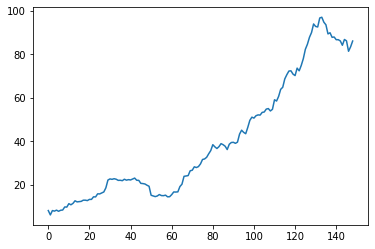

In [87]:
plt.plot(rewards_ma)